<a href="https://colab.research.google.com/github/krish-Algometrix/Machine-Learning-Projects/blob/main/VIX_Indiv_minorp_Sem3_part_1_AA_SC_P2MCA2107470.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import statsmodels as st

In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install garch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for garch: filename=garch-0.1-py3-none-any.whl size=1588 sha256=bd05a004daccb89831560fe0a3df576512d0f7b57be4a9430ada8c92802aacd7
  Stored in directory: /root/.cache/pip/wheels/83/d6/a0/63b764a634cda23c28afc1c0341fc0443ae758ae5fd2bcfebe
Successfully built garch


In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 20.7 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

In [ ]:
path = "/content/drive/MyDrive/cvix.csv"

In [ ]:
vix = pd.read_csv(path)
type(vix)

pandas.core.frame.DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8374 non-null   object 
 1   cvs     8374 non-null   float64
dtypes: float64(1), object(1)
memory usage: 131.0+ KB


(None,
                cvs
 count  8374.000000
 mean     19.675254
 std       7.969064
 min       9.140000
 25%      13.910000
 50%      17.880000
 75%      23.140000
 max      82.690000,
 array([[<Axes: title={'center': 'cvs'}>]], dtype=object))

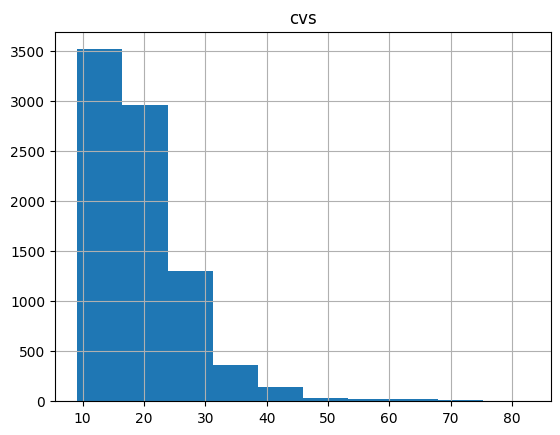

In [ ]:
vix.info(),vix.describe(),vix.hist()

In [ ]:
vix['cvret'] = vix['cvs'].pct_change()

In [ ]:
vix['cvar'] = vix['cvret']**2
vix['cvar'].head(10)

0         NaN
1    0.003036
2    0.003206
3    0.002144
4    0.000056
5    0.009169
6    0.000117
7    0.011344
8    0.052408
9    0.004760
Name: cvar, dtype: float64

In [ ]:
vix['cvret'].head(10)

0         NaN
1    0.055104
2    0.056625
3    0.046306
4    0.007459
5    0.095755
6    0.010811
7   -0.106506
8    0.228928
9    0.068994
Name: cvret, dtype: float64

In [ ]:
vix.tail(10),vix.head(10)

(            date    cvs     cvret      cvar
 8364  26-11-2012  24.80  0.096860  0.009382
 8365  27-11-2012  26.52  0.069355  0.004810
 8366  28-11-2012  23.73 -0.105204  0.011068
 8367  29-11-2012  26.14  0.101559  0.010314
 8368  30-11-2012  22.99 -0.120505  0.014521
 8369  01-12-2012  25.51  0.109613  0.012015
 8370  02-12-2012  24.15 -0.053312  0.002842
 8371  03-12-2012  21.38 -0.114700  0.013156
 8372  04-12-2012  22.26  0.041160  0.001694
 8373  05-12-2012  22.61  0.015723  0.000247,
          date    cvs     cvret      cvar
 0  02-01-1990  17.24       NaN       NaN
 1  03-01-1990  18.19  0.055104  0.003036
 2  04-01-1990  19.22  0.056625  0.003206
 3  05-01-1990  20.11  0.046306  0.002144
 4  06-01-1990  20.26  0.007459  0.000056
 5  07-01-1990  22.20  0.095755  0.009169
 6  08-01-1990  22.44  0.010811  0.000117
 7  09-01-1990  20.05 -0.106506  0.011344
 8  10-01-1990  24.64  0.228928  0.052408
 9  11-01-1990  26.34  0.068994  0.004760)

In [ ]:
vix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8374 non-null   object 
 1   cvs     8374 non-null   float64
 2   cvret   8373 non-null   float64
 3   cvar    8373 non-null   float64
dtypes: float64(3), object(1)
memory usage: 261.8+ KB


In [ ]:
vix['cvret'][0] = vix['cvret'][1]

<ipython-input-14-1c2f619339d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vix['cvret'][0] = vix['cvret'][1]


In [ ]:
vix['cvret'].head(10)

0    0.055104
1    0.055104
2    0.056625
3    0.046306
4    0.007459
5    0.095755
6    0.010811
7   -0.106506
8    0.228928
9    0.068994
Name: cvret, dtype: float64

(<Axes: >,
 count    8374.000000
 mean        0.002353
 std         0.070226
 min        -0.295726
 25%        -0.037234
 50%        -0.003929
 75%         0.033110
 max         1.155979
 Name: cvret, dtype: float64)

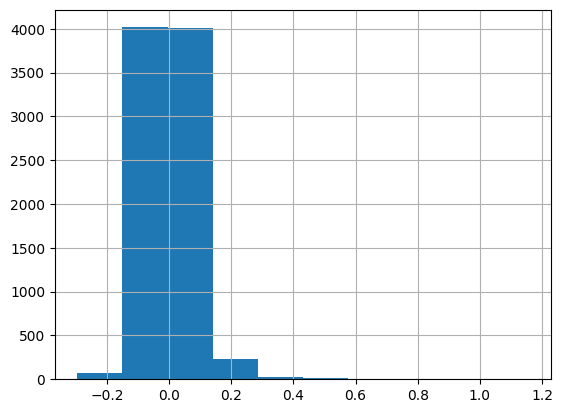

In [ ]:
vix['cvret'].hist(), vix['cvret'].describe()

<ipython-input-17-e1c394cdb857>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vix['cvar'][0] = vix['cvar'][1]


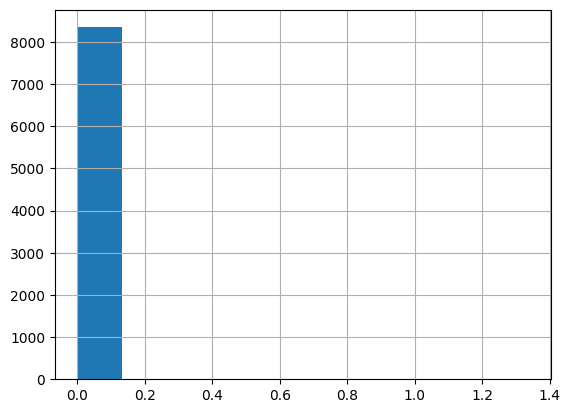

In [ ]:
vix['cvar'].hist(), vix['cvar'].describe()
vix['cvar'][0] = vix['cvar'][1]

In [ ]:
vix['cvar'].info

<bound method Series.info of 0       0.003036
1       0.003036
2       0.003206
3       0.002144
4       0.000056
          ...   
8369    0.012015
8370    0.002842
8371    0.013156
8372    0.001694
8373    0.000247
Name: cvar, Length: 8374, dtype: float64>

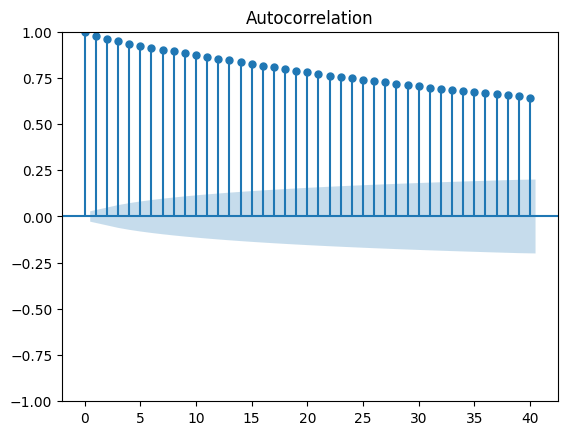

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(vix['cvs'].values.squeeze(), alpha = 0.01, lags = 40)
plt.show()

understanding the ACF of vix returns

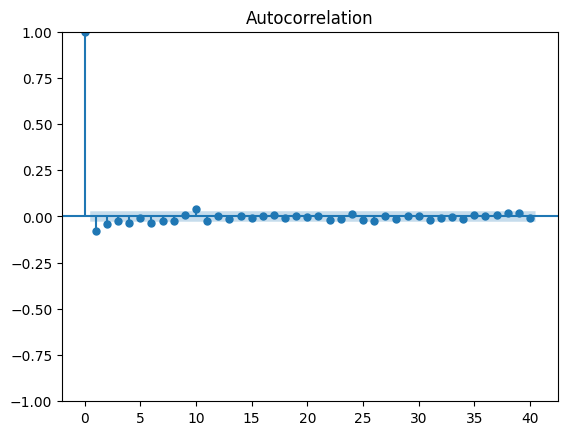

In [ ]:
sm.graphics.tsa.plot_acf(vix['cvret'].values.squeeze(), alpha = 0.01, lags = 40)
plt.show()

understanding ACF on the square of the returns proxy for variance cvar

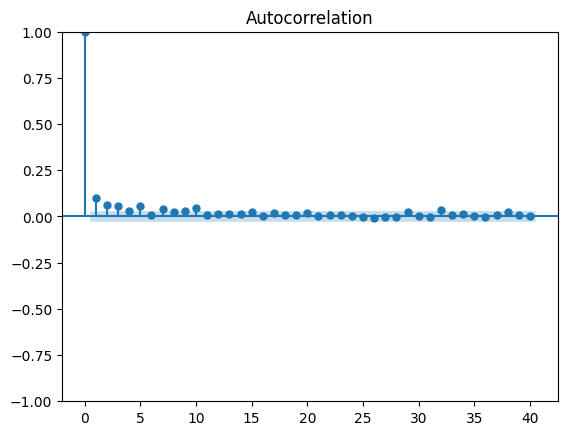

In [ ]:
sm.graphics.tsa.plot_acf(vix['cvar'].values.squeeze(), alpha = 0.01, lags = 40)
plt.show()

(<Axes: xlabel='y(t)', ylabel='y(t + 1)'>,
 <Axes: xlabel='y(t)', ylabel='y(t + 1)'>)

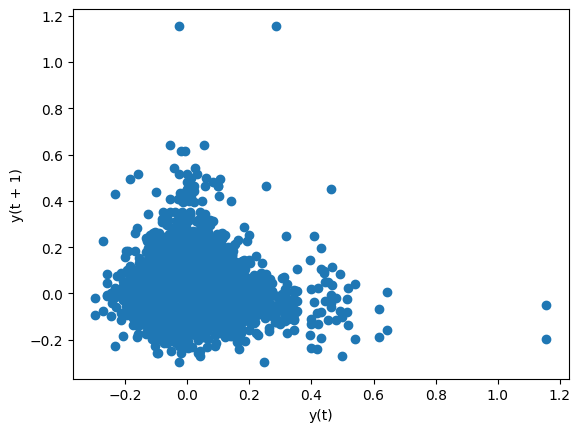

In [ ]:
pd.plotting.lag_plot(vix['cvret'], lag= 40),pd.plotting.lag_plot(vix['cvret'])


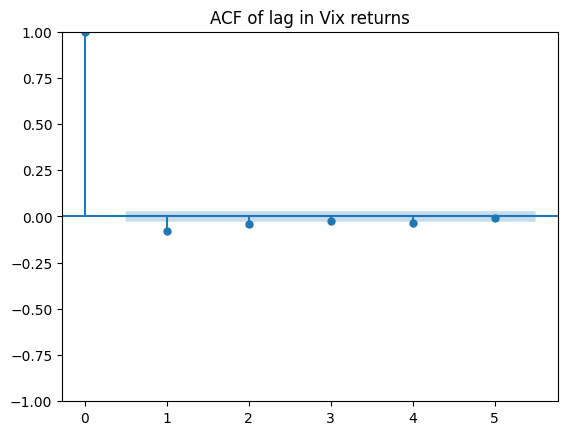

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(vix['cvret'].values.squeeze(), alpha = 0.01, lags =5, title = "ACF of lag in Vix returns")
plt.show()

(<Axes: xlabel='y(t)', ylabel='y(t + 5)'>,
 <Axes: xlabel='y(t)', ylabel='y(t + 5)'>)

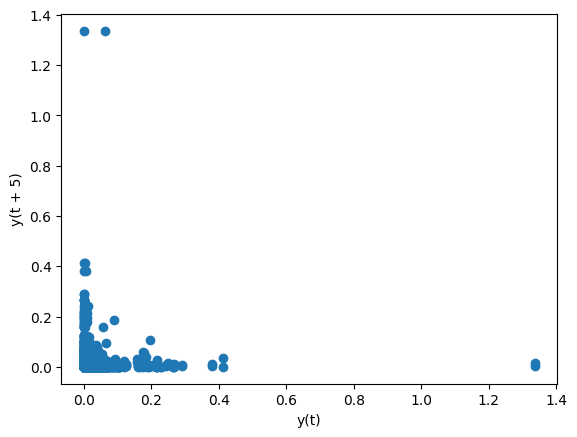

In [ ]:
pd.plotting.lag_plot(vix['cvar'], lag= 40),pd.plotting.lag_plot(vix['cvar'], lag= 5)

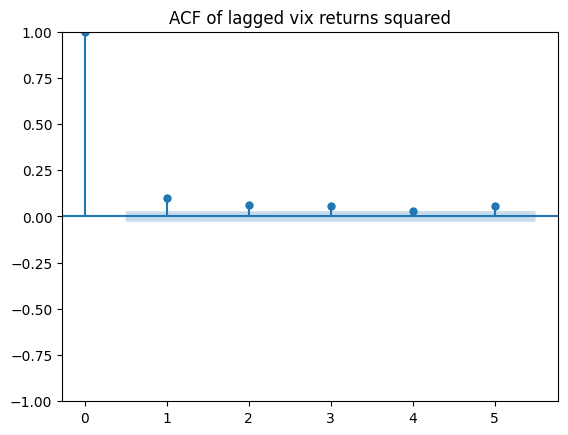

In [ ]:
sm.graphics.tsa.plot_acf(vix['cvar'].values.squeeze(), alpha = 0.01, lags =5, title ="ACF of lagged vix returns squared")
plt.show()

Interstingly we see that in the first difference of VIX series, we have some autocorrelation although very small and eventually dies out . Similarly in the square of the vix return series too, we see that there is autocorrelation over five lags or more. This means there is some variance which changes over time which is also in line with theory.

After having tested the lagged vix return series and the variance of the lagged return series for serial autocorrelation, we try to a fit a arch model the variance of vix return series.

Since we are interested in the volatility modeling of VIX index, we create a new object univariate series called by assigning cvar series to vix_cvar which the volatility of the Vix Index or variance of vix index.

<class 'pandas.core.series.Series'>
RangeIndex: 8374 entries, 0 to 8373
Series name: cvar
Non-Null Count  Dtype  
--------------  -----  
8374 non-null   float64
dtypes: float64(1)
memory usage: 65.5 KB


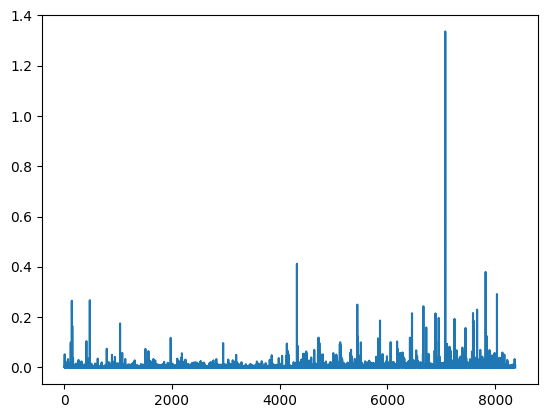

In [ ]:
vix_cvar = vix['cvar']
vix_cvar.head(10)
vix_cvar.tail(10)
vix_cvar.info()
plt.plot(vix_cvar)  # plot of the squared servies of first differences of vix index proxy historical observed variance

The next step is to split the data into test and trainning sample . We therefore split the data vix_cvar

In [ ]:
vix_cvar_test = 50

In [ ]:
train,test =  vix_cvar[:-vix_cvar_test], vix_cvar[-vix_cvar_test:]

We now define the model ARCH(1,1) and fit the model to the vix_cvar training data

In [ ]:
vix_cvar_arch = arch_model(train, mean='Zero', vol='ARCH', p = 1,rescale= False)

In [ ]:
vix_cvar_arch_fit = vix_cvar_arch.fit()

Iteration:      1,   Func. Count:      3,   Neg. LLF: -22741.26766900653
Optimization terminated successfully    (Exit mode 0)
            Current function value: -22741.267664219155
            Iterations: 5
            Function evaluations: 3
            Gradient evaluations: 1


In [ ]:
# obtaining the summary of the ARCH model
vix_cvar_arch_fit

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                   cvar   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                22741.3
Distribution:                  Normal   AIC:                          -45478.5
Method:            Maximum Likelihood   BIC:                          -45464.5
                                        No. Observations:                 8324
Date:                Mon, Jun 19 2023   Df Residuals:                     8324
Time:                        16:07:20   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.9818e-04  3.344e-05      5.926  3.104e-09 [1.

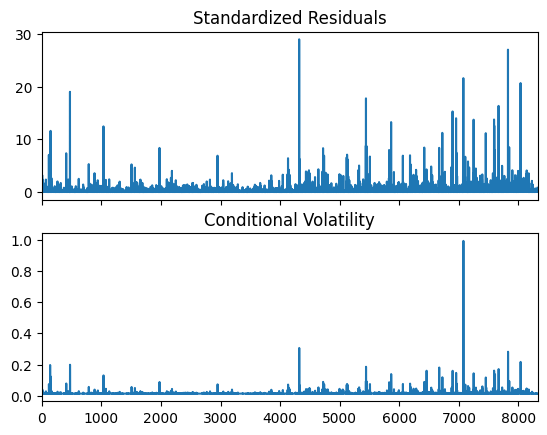

In [ ]:
visualize_res = vix_cvar_arch_fit.plot()

Interpretation of the results after modelling the vix return series on ARCH mean model.

Forecasting the arch model on the test set of data vix_cvar

In [ ]:
vix_cvar_hat_fit = vix_cvar_arch_fit.forecast(horizon = 1, start =50,reindex = False)

In [ ]:
print(vix_cvar_hat_fit.mean)
print(vix_cvar_hat_fit.residual_variance)
print(vix_cvar_hat_fit.variance)

      h.1
50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
...   ...
8319  0.0
8320  0.0
8321  0.0
8322  0.0
8323  0.0

[8274 rows x 1 columns]
           h.1
50    0.000209
51    0.000200
52    0.000207
53    0.000199
54    0.000200
...        ...
8319  0.000205
8320  0.000200
8321  0.000207
8322  0.000198
8323  0.000271

[8274 rows x 1 columns]
           h.1
50    0.000209
51    0.000200
52    0.000207
53    0.000199
54    0.000200
...        ...
8319  0.000205
8320  0.000200
8321  0.000207
8322  0.000198
8323  0.000271

[8274 rows x 1 columns]


In [ ]:
print(vix_cvar_hat_fit.variance.tail())


           h.1
8319  0.000205
8320  0.000200
8321  0.000207
8322  0.000198
8323  0.000271


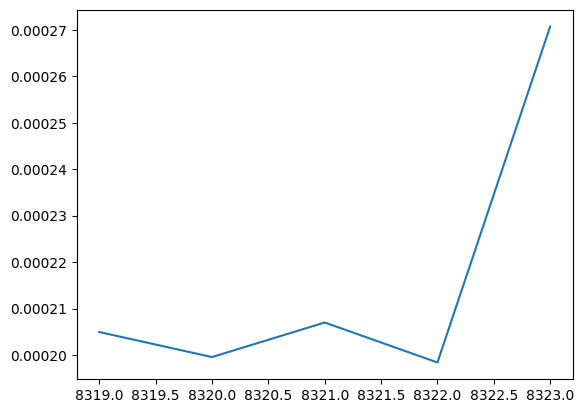

In [ ]:
plt.plot(vix_cvar_hat_fit.variance.tail())  # conditional volatility over the tail of the dist


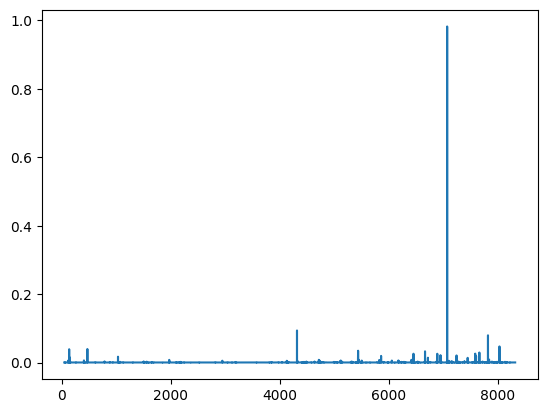

In [ ]:
plt.plot(vix_cvar_hat_fit.variance)  # forecasted conditional volatility for all time steps

In [ ]:
cvarF = vix_cvar_hat_fit.variance
cvarF

,h.1
50,0.000209
51,0.000200
52,0.000207
53,0.000199
54,0.000200
...,...
8319,0.000205
8320,0.000200
8321,0.000207
8322,0.000198
